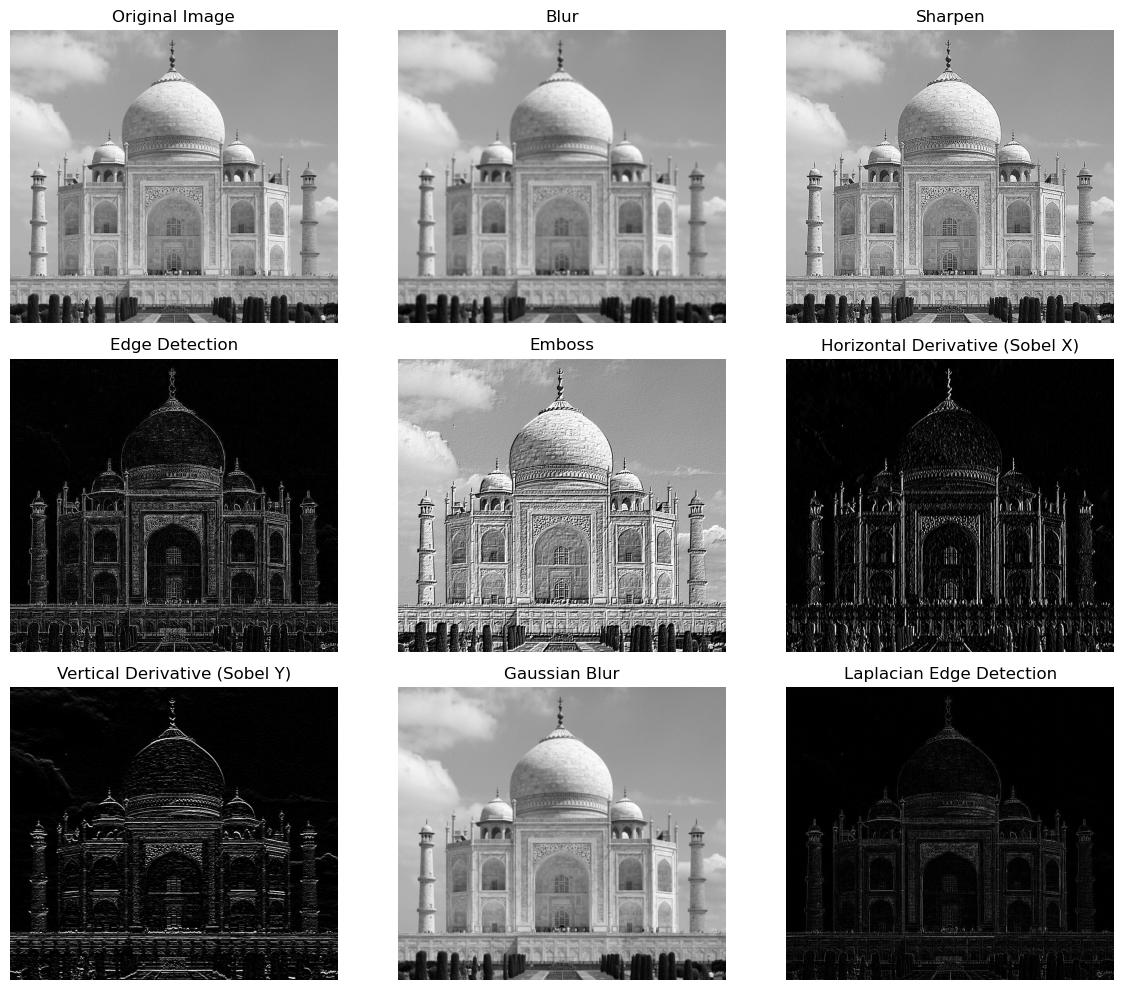

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load an image
image = cv2.imread('./images/Taj_Mahal.jpg', cv2.IMREAD_GRAYSCALE)

# Define different kernels
kernels = {
    "Blur": np.ones((5, 5), np.float32) / 25,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Horizontal Derivative (Sobel X)": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Vertical Derivative (Sobel Y)": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16,
    "Laplacian Edge Detection": np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
}

# Calculate the number of subplots needed
num_kernels = len(kernels) + 1  # +1 for the original image
num_cols = 3  # Define number of columns you want in the grid
num_rows = math.ceil(num_kernels / num_cols)  # Calculate rows required

# Apply each kernel to the image
filtered_images = {name: cv2.filter2D(image, -1, kernel) for name, kernel in kernels.items()}

# Plot original and filtered images
plt.figure(figsize=(12, 10))
plt.subplot(num_rows, num_cols, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

for i, (name, filtered_img) in enumerate(filtered_images.items(), 2):
    plt.subplot(num_rows, num_cols, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(name)
    plt.axis("off")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


1. Basic Morphological Operations Demo


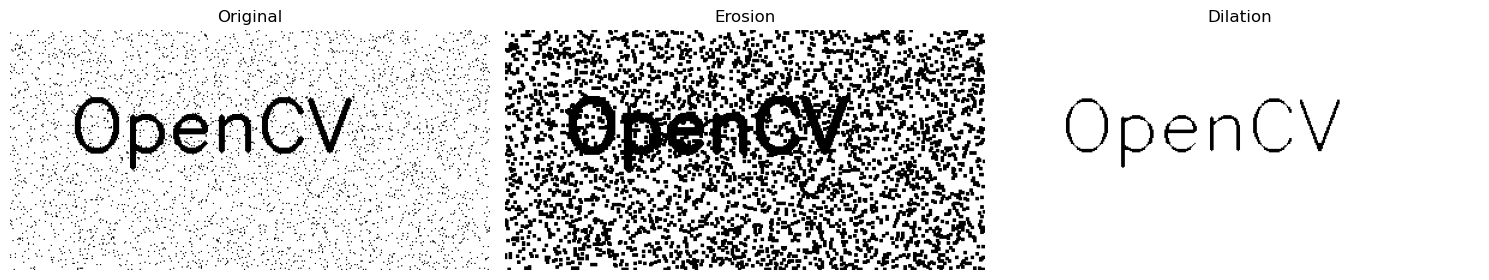

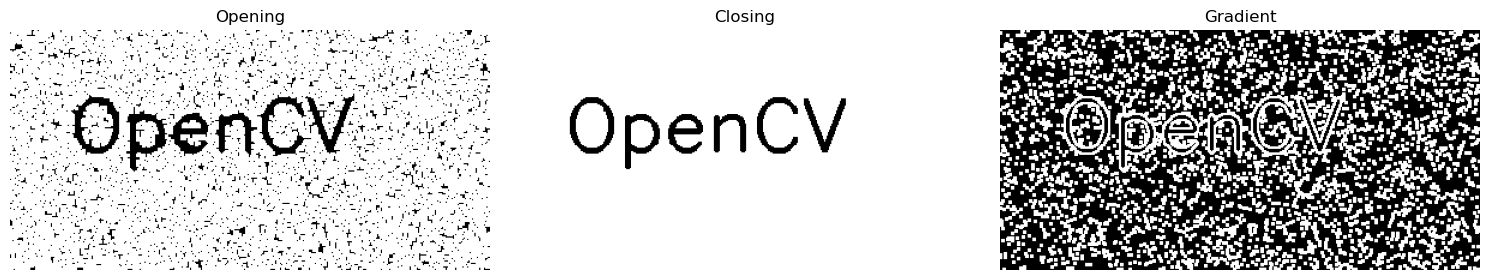


2. Noise Removal Applications


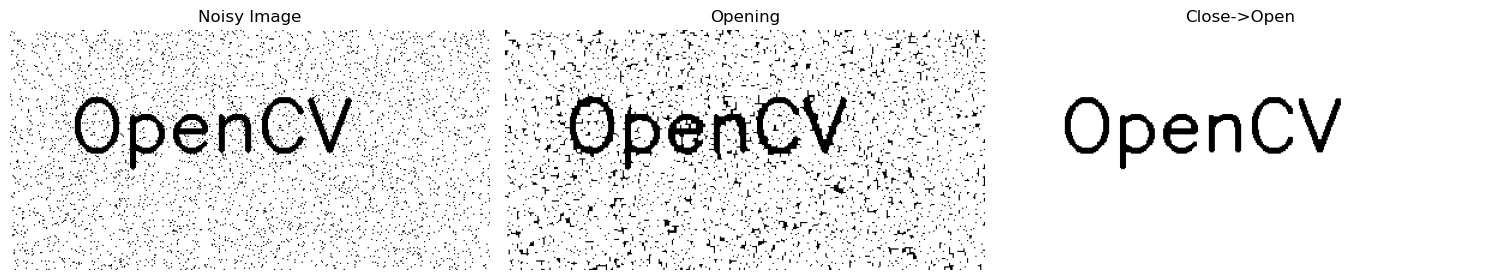

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_results(images, titles):
    """
    Display multiple images in a row using matplotlib
    """
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def create_sample_image():
    """
    Create a sample binary image with text and noise
    """
    # Create base image
    img = np.ones((200, 400), dtype=np.uint8) * 255
    
    # Add text
    cv2.putText(img, 'OpenCV', (50, 100), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, 0, 3)
    
    # Create noise with the same data type as the image
    noise = np.random.choice([0, 255], size=(200, 400), p=[0.05, 0.95]).astype(np.uint8)
    
    # Combine image and noise
    noisy_img = cv2.bitwise_and(img, noise)
    
    return noisy_img

def morphological_operations_demo():
    # Create sample image
    original = create_sample_image()
    
    # Define kernels
    kernel_3x3 = np.ones((3, 3), np.uint8)
    kernel_5x5 = np.ones((5, 5), np.uint8)
    
    # 1. Erosion
    eroded = cv2.erode(original, kernel_3x3, iterations=1)
    
    # 2. Dilation
    dilated = cv2.dilate(original, kernel_3x3, iterations=1)
    
    # 3. Opening (Erosion followed by Dilation)
    opened = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel_3x3)
    
    # 4. Closing (Dilation followed by Erosion)
    closed = cv2.morphologyEx(original, cv2.MORPH_CLOSE, kernel_3x3)
    
    # 5. Gradient (Difference between Dilation and Erosion)
    gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel_3x3)
    
    # Show basic operations
    show_results([original, eroded, dilated],
                ['Original', 'Erosion', 'Dilation'])
    
    # Show advanced operations
    show_results([opened, closed, gradient],
                ['Opening', 'Closing', 'Gradient'])

def noise_removal_demo():
    # Create noisy image
    img = create_sample_image()
    
    # Apply different combinations of operations
    kernel = np.ones((3, 3), np.uint8)
    
    # Method 1: Opening (removes small noise)
    denoised1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    # Method 2: Closing followed by Opening
    denoised2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    denoised2 = cv2.morphologyEx(denoised2, cv2.MORPH_OPEN, kernel)
    
    # Show results
    show_results([img, denoised1, denoised2],
                ['Noisy Image', 'Opening', 'Close->Open'])

def main():
    print("1. Basic Morphological Operations Demo")
    morphological_operations_demo()
    
    print("\n2. Noise Removal Applications")
    noise_removal_demo()

if __name__ == "__main__":
    main()